# Data Project: SQL Database 
This file is used to clean the fitbit_fitness_tracker_RAW.csv file

## Importing Libraries

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from IPython.display import display
warnings.filterwarnings('ignore')

## Loading the Fitbit CSV Data 

In [276]:
# Definig the file path 
file_path = "Datasets_files/Data_files_fitbit/fitbit_fitness_tracker_RAW.csv"

# Loading the CSV file into a dataframe 
fitbit_df = pd.read_csv(file_path)

# Displaying the first 10 rows of the dataframe
fitbit_df.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/7/2016,11992,7.71,7.71,0.0,2.46,2.12,3.13,0.0,37,46,175,833,1821
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/6/2016,12159,8.03,8.03,0.0,1.97,0.25,5.81,0.0,24,6,289,754,1896
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/1/2016,10602,6.81,6.81,0.0,2.29,1.60,2.92,0.0,33,35,246,730,1820
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/30/2016,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
5,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
6,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/25/2016,15355,9.80,9.80,0.0,5.29,0.57,3.94,0.0,73,14,216,814,2013
7,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/5/2016,14070,8.90,8.90,0.0,2.92,1.08,4.88,0.0,45,24,250,857,1959
8,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/28/2016,13154,8.53,8.53,0.0,3.54,1.16,3.79,0.0,48,28,189,782,1898
9,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/29/2016,11181,7.15,7.15,0.0,1.06,0.50,5.58,0.0,16,12,243,815,1837


In [277]:
# Reviewing the names of the columns in a list form

#print(fitbit_df.columns.tolist())
for i, col in enumerate(fitbit_df.columns):
    print(f"{i}: {col}")

0: Id
1: SleepDay
2: TotalSleepRecords
3: TotalMinutesAsleep
4: TotalTimeInBed
5: ActivityDate
6: TotalSteps
7: TotalDistance
8: TrackerDistance
9: LoggedActivitiesDistance
10: VeryActiveDistance
11: ModeratelyActiveDistance
12: LightActiveDistance
13: SedentaryActiveDistance
14: VeryActiveMinutes
15: FairlyActiveMinutes
16: LightlyActiveMinutes
17: SedentaryMinutes
18: Calories


**Reviewing the dataset for any null, missing values, and duplicates.**

In [278]:
# Obtaining and Displaying the missing data points per column 
missing_values_count = fitbit_df.isnull().sum()
missing_values_count[:]

Id                          0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [279]:
# Checking for duplicates 
fitbit_df.duplicated().sum()

93

In [280]:
# Showing where the duplicates are
fitbit_df[fitbit_df.duplicated()]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
4764,4388161847,5/5/2016 12:00:00 AM,1,471,495,4/17/2016,4660,3.58,3.58,0.000000,0.00,0.00,3.58,0.0,0,0,201,721,2572
4765,4388161847,5/5/2016 12:00:00 AM,1,471,495,4/18/2016,11009,9.10,9.10,0.000000,3.56,0.40,5.14,0.0,27,8,239,1017,3274
4766,4388161847,5/5/2016 12:00:00 AM,1,471,495,4/19/2016,10181,7.83,7.83,0.000000,1.37,0.69,5.77,0.0,20,16,249,704,3015
4767,4388161847,5/5/2016 12:00:00 AM,1,471,495,4/21/2016,10055,7.73,7.73,0.000000,0.37,0.39,6.98,0.0,7,12,272,853,3069
4768,4388161847,5/5/2016 12:00:00 AM,1,471,495,4/15/2016,8758,6.73,6.73,0.000000,0.00,0.00,6.73,0.0,0,0,299,837,3066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11474,8378563200,4/25/2016 12:00:00 AM,1,388,402,5/3/2016,8712,6.91,6.91,2.253081,1.34,1.06,4.50,0.0,71,20,195,822,3784
11475,8378563200,4/25/2016 12:00:00 AM,1,388,402,4/25/2016,12405,9.84,9.84,2.092147,5.05,0.87,3.92,0.0,117,16,141,692,4005
11476,8378563200,4/25/2016 12:00:00 AM,1,388,402,4/26/2016,16208,12.85,12.85,0.000000,7.51,0.92,4.42,0.0,90,18,161,593,3763
11477,8378563200,4/25/2016 12:00:00 AM,1,388,402,4/23/2016,5709,4.53,4.53,0.000000,1.52,0.52,2.48,0.0,19,10,136,740,2908


In [281]:
fitbit_df.duplicated(subset=["SleepDay", "ActivityDate"]).sum()
fitbit_df[fitbit_df.duplicated(subset=["SleepDay", "ActivityDate"], keep=False)]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/7/2016,11992,7.71,7.71,0.0,2.46,2.12,3.13,0.0,37,46,175,833,1821
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/6/2016,12159,8.03,8.03,0.0,1.97,0.25,5.81,0.0,24,6,289,754,1896
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/1/2016,10602,6.81,6.81,0.0,2.29,1.60,2.92,0.0,33,35,246,730,1820
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/30/2016,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12436,8792009665,5/4/2016 12:00:00 AM,1,439,463,4/27/2016,1758,1.13,1.13,0.0,0.00,0.00,1.13,0.0,0,0,112,900,2067
12437,8792009665,5/4/2016 12:00:00 AM,1,439,463,4/28/2016,6157,3.94,3.94,0.0,0.00,0.00,3.94,0.0,0,0,310,714,2780
12438,8792009665,5/4/2016 12:00:00 AM,1,439,463,4/29/2016,8360,5.35,5.35,0.0,0.14,0.28,4.93,0.0,6,14,380,634,3101
12439,8792009665,5/4/2016 12:00:00 AM,1,439,463,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896


**Finding out the basic information of the fitbit dataset:**
- no. of rows and columns
- name of columns 
- type of values

In [282]:
# Showing the basic information of the dataset
fitbit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12441 entries, 0 to 12440
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        12441 non-null  int64  
 1   SleepDay                  12441 non-null  object 
 2   TotalSleepRecords         12441 non-null  int64  
 3   TotalMinutesAsleep        12441 non-null  int64  
 4   TotalTimeInBed            12441 non-null  int64  
 5   ActivityDate              12441 non-null  object 
 6   TotalSteps                12441 non-null  int64  
 7   TotalDistance             12441 non-null  float64
 8   TrackerDistance           12441 non-null  float64
 9   LoggedActivitiesDistance  12441 non-null  float64
 10  VeryActiveDistance        12441 non-null  float64
 11  ModeratelyActiveDistance  12441 non-null  float64
 12  LightActiveDistance       12441 non-null  float64
 13  SedentaryActiveDistance   12441 non-null  float64
 14  VeryAc

In [283]:
# Counting the unique ID and reviewing how much IDs it has
#fitbit_df["Id"].nunique()
unique_id = len(pd.unique(fitbit_df["Id"])) 
print("Amount of unique Id: " + str(unique_id))

Amount of unique Id: 24


In [284]:
# Checking for thhe amount of rows & columns
#print(len(fitbit_df))
print(fitbit_df.shape)

(12441, 19)


**Based on the initial observations, I conclude the following:**
There are no missing or null values in the dataset.
The dataset contains 19 columns and 12,441 rows.
The ActivityDate column is currently of type object and should be converted to datetime64.
There are 24 unique user IDs in the dataset.
There are 93 duplicated rows based on the Id column. However, these duplicates differ in key activity-related columns such as ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, and Calories, indicating that they represent different records for the same user.

**The following data manipulations were performed:**
- renaming the columns
- Converted the activity_date column to datetime64 data type.
- Reformatted activity_date to follow the YYYY-MM-DD format.
- Converted the sleep_date column to datetime64 data type.
- Reformatted sleep_date to follow the YYYY-MM-DD format.
- Created a new column, day_of_the_week, to extract the day name from each date for further analysis.
- Added a new column, total_minutes, representing the total of very_active_minutes, fairly_active_minutes, lightly_active_minutes, and sedentary_minutes.
- Created a new column, total_hours, by converting total_mins into hours.
- Added a new colum, total_hours_asleep
- Added a new colum, total_hours_in_bed
- Calculated total_hours_asleep and total_hours_in_bed in hours
- Renamed and rearranged columns for improved readability and structure.

In [285]:
df = fitbit_df.rename(columns= {
    'Id': 'id',
    'SleepDay': 'sleep_day',
    'TotalSleepRecords': 'total_sleep_records',
    'TotalMinutesAsleep': 'total_minutes_asleep',
    'TotalTimeInBed': 'total_time_in_bed',
    'ActivityDate': 'activity_date',
    'TotalSteps': 'total_steps',
    'TotalDistance': 'total_distance',
    'TrackerDistance': 'tracker_distance',
    'LoggedActivitiesDistance': 'logged_activities_distance',
    'VeryActiveDistance': 'very_active_distance',
    'ModeratelyActiveDistance': 'moderately_active_distance',
    'LightActiveDistance': 'light_active_distance',
    'SedentaryActiveDistance': 'sedentary_active_distance',
    'VeryActiveMinutes': 'very_active_minutes',
    'FairlyActiveMinutes': 'fairly_active_minutes',
    'LightlyActiveMinutes': 'lightly_active_minutes',
    'SedentaryMinutes': 'sedentary_minutes',
    'Calories': 'calories'
})

In [286]:
# Converted the ActivityDate column to datetime64 data type and formatted to DD-MM-YY format
#df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], format="%d/%m/%Y")

# Converting the ActivityDate column to datatime64 dtype and format to dd-mm-yyyy
# Note: data might seems off to parse it to EU format, so it will be parsed to US format
df["activity_date"] = pd.to_datetime(df["activity_date"], format="%m/%d/%Y")

In [287]:
# Converting Sleepday to datetime64 
df["sleep_day"] = pd.to_datetime(df["sleep_day"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12441 entries, 0 to 12440
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          12441 non-null  int64         
 1   sleep_day                   12441 non-null  datetime64[ns]
 2   total_sleep_records         12441 non-null  int64         
 3   total_minutes_asleep        12441 non-null  int64         
 4   total_time_in_bed           12441 non-null  int64         
 5   activity_date               12441 non-null  datetime64[ns]
 6   total_steps                 12441 non-null  int64         
 7   total_distance              12441 non-null  float64       
 8   tracker_distance            12441 non-null  float64       
 9   logged_activities_distance  12441 non-null  float64       
 10  very_active_distance        12441 non-null  float64       
 11  moderately_active_distance  12441 non-null  float64   

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,1,327,346,2016-05-07,11992,7.71,7.71,0.0,2.46,2.12,3.13,0.0,37,46,175,833,1821
1,1503960366,2016-04-12,1,327,346,2016-05-06,12159,8.03,8.03,0.0,1.97,0.25,5.81,0.0,24,6,289,754,1896
2,1503960366,2016-04-12,1,327,346,2016-05-01,10602,6.81,6.81,0.0,2.29,1.60,2.92,0.0,33,35,246,730,1820
3,1503960366,2016-04-12,1,327,346,2016-04-30,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947
4,1503960366,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985


**Adding new columns to the dataframe**

In [288]:
# Creating a new column for the day of the week at the normal df
df["day_of_the_week"] = df["activity_date"].dt.day_name()

#printing the first 10 rows for DayOfTheWeek column at the normal df
df["day_of_the_week"].head(10)

0     Saturday
1       Friday
2       Sunday
3     Saturday
4      Tuesday
5    Wednesday
6       Monday
7     Thursday
8     Thursday
9       Friday
Name: day_of_the_week, dtype: object

In [289]:
# Addine new sleep colums to the df	
df["total_hours_asleep"] = round(df["total_minutes_asleep"] / 60)
df["total_hours_in_bed"] = round(df["total_time_in_bed"] / 60)

#printing the first 10 rows 
df["total_hours_asleep"].head(10)

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0
Name: total_hours_asleep, dtype: float64

In [290]:
df["total_hours_in_bed"].head(10)

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
6    6.0
7    6.0
8    6.0
9    6.0
Name: total_hours_in_bed, dtype: float64

In [291]:
print(df["activity_date"].head(10))
# print(fitbit_df["sleep_day"].head(10))

0   2016-05-07
1   2016-05-06
2   2016-05-01
3   2016-04-30
4   2016-04-12
5   2016-04-13
6   2016-04-25
7   2016-05-05
8   2016-04-28
9   2016-04-29
Name: activity_date, dtype: datetime64[ns]


In [292]:
# creating a new column "total_minutes" containing sum of total minutes.
df["total_exercise_minutes"] = df["very_active_minutes"] + df["fairly_active_minutes"] + df["lightly_active_minutes"] + df["sedentary_minutes"]
df["total_exercise_minutes"].head(5)

0    1091
1    1073
2    1044
3    1015
4    1094
Name: total_exercise_minutes, dtype: int64

In [293]:
df["total_exercise_hours"] = round(df["total_exercise_minutes"] / 60)

In [294]:
df.head()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_the_week,total_hours_asleep,total_hours_in_bed,total_exercise_minutes,total_exercise_hours
0,1503960366,2016-04-12,1,327,346,2016-05-07,11992,7.71,7.71,0.0,2.46,2.12,3.13,0.0,37,46,175,833,1821,Saturday,5.0,6.0,1091,18.0
1,1503960366,2016-04-12,1,327,346,2016-05-06,12159,8.03,8.03,0.0,1.97,0.25,5.81,0.0,24,6,289,754,1896,Friday,5.0,6.0,1073,18.0
2,1503960366,2016-04-12,1,327,346,2016-05-01,10602,6.81,6.81,0.0,2.29,1.60,2.92,0.0,33,35,246,730,1820,Sunday,5.0,6.0,1044,17.0
3,1503960366,2016-04-12,1,327,346,2016-04-30,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947,Saturday,5.0,6.0,1015,17.0
4,1503960366,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,5.0,6.0,1094,18.0


In [295]:
# Checking total_exercise_minutes ≤ 1440 (max minutes per day)
df[df["total_exercise_minutes"] > 1440]

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_the_week,total_hours_asleep,total_hours_in_bed,total_exercise_minutes,total_exercise_hours


In [296]:
# Dataset with new arranged columns
activity_columns = ['id', 'activity_date', 'day_of_the_Week', 'total_steps', 'total_distance', 'tracker_distance', 'logged_activities_distance', 'very_active_distance', 'moderately_active_distance', 'light_active_distance', 'sedentary_active_distance', 'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes', 'total_exercise_minutes', 'total_exercise_hours', 'calories']
activity_df = df.reindex(columns=activity_columns)
activity_df.head()

# Saving the activity dataset to a new csv file
activity_df.to_csv("Datasets_files/Data_files_Fitbit/cleaned_activity_df.csv", index=False)

In [297]:
# Dataset with new arranged columns
sleep_columns = ['id', 'sleep_day', 'total_sleep_records', 'total_minutes_asleep', 'total_hours_asleep', 'total_time_in_bed', 'total_hours_in_bed']
sleep_df = df.reindex(columns=sleep_columns)
sleep_df.head()

# Saving the activity dataset to a new csv file
sleep_df.to_csv("Datasets_files/Data_files_Fitbit/cleaned_sleep_df.csv", index=False)

In [298]:
print(activity_df.columns)
print(sleep_df.columns)

Index(['id', 'activity_date', 'day_of_the_Week', 'total_steps',
       'total_distance', 'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'total_exercise_minutes',
       'total_exercise_hours', 'calories'],
      dtype='object')
Index(['id', 'sleep_day', 'total_sleep_records', 'total_minutes_asleep',
       'total_hours_asleep', 'total_time_in_bed', 'total_hours_in_bed'],
      dtype='object')


In [299]:
df.head()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_the_week,total_hours_asleep,total_hours_in_bed,total_exercise_minutes,total_exercise_hours
0,1503960366,2016-04-12,1,327,346,2016-05-07,11992,7.71,7.71,0.0,2.46,2.12,3.13,0.0,37,46,175,833,1821,Saturday,5.0,6.0,1091,18.0
1,1503960366,2016-04-12,1,327,346,2016-05-06,12159,8.03,8.03,0.0,1.97,0.25,5.81,0.0,24,6,289,754,1896,Friday,5.0,6.0,1073,18.0
2,1503960366,2016-04-12,1,327,346,2016-05-01,10602,6.81,6.81,0.0,2.29,1.60,2.92,0.0,33,35,246,730,1820,Sunday,5.0,6.0,1044,17.0
3,1503960366,2016-04-12,1,327,346,2016-04-30,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947,Saturday,5.0,6.0,1015,17.0
4,1503960366,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,5.0,6.0,1094,18.0


In [300]:
#this would convert it into hours and minutes
# fitbit_df["total_time"] = fitbit_df["total_minutes"].apply(
#     lambda x: pd.Timedelta(minutes=x).components
# )

# fitbit_df["total_time"] = fitbit_df["total_minutes"].apply(
#     lambda x: f"{pd.Timedelta(minutes=x).components.hours:02d}:{pd.Timedelta(minutes=x).components.minutes:02d}"
# )
# print(fitbit_df["total_time"])

In [301]:
# New column - combines active and very active distance
df['Performance'] = df['very_active_distance'] + df['moderately_active_distance']
df['Performance'] = df['Performance'].round(1)

In [302]:
# New dataset - all the times the user slept more than 7 hours
df_good_sleepers = df[df['total_hours_asleep'] > 7]
df_good_sleepers.to_csv("Datasets_files/Data_files_Fitbit/cleaned_good_sleepers_df.csv", index=False)
df_good_sleepers

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_the_week,total_hours_asleep,total_hours_in_bed,total_exercise_minutes,total_exercise_hours,Performance
124,1503960366,2016-04-17,1,700,712,2016-05-07,11992,7.71,7.71,0.0,2.46,2.12,3.13,0.0,37,46,175,833,1821,Saturday,12.0,12.0,1091,18.0,4.6
125,1503960366,2016-04-17,1,700,712,2016-05-06,12159,8.03,8.03,0.0,1.97,0.25,5.81,0.0,24,6,289,754,1896,Friday,12.0,12.0,1073,18.0,2.2
126,1503960366,2016-04-17,1,700,712,2016-05-01,10602,6.81,6.81,0.0,2.29,1.60,2.92,0.0,33,35,246,730,1820,Sunday,12.0,12.0,1044,17.0,3.9
127,1503960366,2016-04-17,1,700,712,2016-04-30,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947,Saturday,12.0,12.0,1015,17.0,5.0
128,1503960366,2016-04-17,1,700,712,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,12.0,12.0,1094,18.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12407,8792009665,2016-05-03,1,516,545,2016-04-27,1758,1.13,1.13,0.0,0.00,0.00,1.13,0.0,0,0,112,900,2067,Wednesday,9.0,9.0,1012,17.0,0.0
12408,8792009665,2016-05-03,1,516,545,2016-04-28,6157,3.94,3.94,0.0,0.00,0.00,3.94,0.0,0,0,310,714,2780,Thursday,9.0,9.0,1024,17.0,0.0
12409,8792009665,2016-05-03,1,516,545,2016-04-29,8360,5.35,5.35,0.0,0.14,0.28,4.93,0.0,6,14,380,634,3101,Friday,9.0,9.0,1034,17.0,0.4
12410,8792009665,2016-05-03,1,516,545,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,Saturday,9.0,9.0,1080,18.0,0.7


In [303]:
# New dataset - all the times the user slept between 6 and 7 hours
df_moderate_sleepers = df[(df['total_hours_asleep'] >= 6) & (df['total_hours_asleep'] <= 7)]
df_moderate_sleepers.to_csv("Datasets_files/Data_files_Fitbit/cleaned_moderate_sleepers_df.csv", index=False)
df_moderate_sleepers

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_the_week,total_hours_asleep,total_hours_in_bed,total_exercise_minutes,total_exercise_hours,Performance
31,1503960366,2016-04-13,2,384,407,2016-05-07,11992,7.71,7.71,0.0,2.46,2.12,3.13,0.0,37,46,175,833,1821,Saturday,6.0,7.0,1091,18.0,4.6
32,1503960366,2016-04-13,2,384,407,2016-05-06,12159,8.03,8.03,0.0,1.97,0.25,5.81,0.0,24,6,289,754,1896,Friday,6.0,7.0,1073,18.0,2.2
33,1503960366,2016-04-13,2,384,407,2016-05-01,10602,6.81,6.81,0.0,2.29,1.60,2.92,0.0,33,35,246,730,1820,Sunday,6.0,7.0,1044,17.0,3.9
34,1503960366,2016-04-13,2,384,407,2016-04-30,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947,Saturday,6.0,7.0,1015,17.0,5.0
35,1503960366,2016-04-13,2,384,407,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,6.0,7.0,1094,18.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12436,8792009665,2016-05-04,1,439,463,2016-04-27,1758,1.13,1.13,0.0,0.00,0.00,1.13,0.0,0,0,112,900,2067,Wednesday,7.0,8.0,1012,17.0,0.0
12437,8792009665,2016-05-04,1,439,463,2016-04-28,6157,3.94,3.94,0.0,0.00,0.00,3.94,0.0,0,0,310,714,2780,Thursday,7.0,8.0,1024,17.0,0.0
12438,8792009665,2016-05-04,1,439,463,2016-04-29,8360,5.35,5.35,0.0,0.14,0.28,4.93,0.0,6,14,380,634,3101,Friday,7.0,8.0,1034,17.0,0.4
12439,8792009665,2016-05-04,1,439,463,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,Saturday,7.0,8.0,1080,18.0,0.7


In [304]:
df_bad_sleepers = df[(df['total_hours_asleep'] < 6)]
df_bad_sleepers.to_csv("Datasets_files/Data_files_Fitbit/cleaned_bad_sleepers_df.csv", index=False)
df_bad_sleepers

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_the_week,total_hours_asleep,total_hours_in_bed,total_exercise_minutes,total_exercise_hours,Performance
0,1503960366,2016-04-12,1,327,346,2016-05-07,11992,7.71,7.71,0.000000,2.46,2.12,3.13,0.0,37,46,175,833,1821,Saturday,5.0,6.0,1091,18.0,4.6
1,1503960366,2016-04-12,1,327,346,2016-05-06,12159,8.03,8.03,0.000000,1.97,0.25,5.81,0.0,24,6,289,754,1896,Friday,5.0,6.0,1073,18.0,2.2
2,1503960366,2016-04-12,1,327,346,2016-05-01,10602,6.81,6.81,0.000000,2.29,1.60,2.92,0.0,33,35,246,730,1820,Sunday,5.0,6.0,1044,17.0,3.9
3,1503960366,2016-04-12,1,327,346,2016-04-30,14673,9.25,9.25,0.000000,3.56,1.42,4.27,0.0,52,34,217,712,1947,Saturday,5.0,6.0,1015,17.0,5.0
4,1503960366,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0.000000,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,5.0,6.0,1094,18.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11815,8378563200,2016-05-06,1,323,355,2016-05-03,8712,6.91,6.91,2.253081,1.34,1.06,4.50,0.0,71,20,195,822,3784,Tuesday,5.0,6.0,1108,18.0,2.4
11816,8378563200,2016-05-06,1,323,355,2016-04-25,12405,9.84,9.84,2.092147,5.05,0.87,3.92,0.0,117,16,141,692,4005,Monday,5.0,6.0,966,16.0,5.9
11817,8378563200,2016-05-06,1,323,355,2016-04-26,16208,12.85,12.85,0.000000,7.51,0.92,4.42,0.0,90,18,161,593,3763,Tuesday,5.0,6.0,862,14.0,8.4
11818,8378563200,2016-05-06,1,323,355,2016-04-23,5709,4.53,4.53,0.000000,1.52,0.52,2.48,0.0,19,10,136,740,2908,Saturday,5.0,6.0,905,15.0,2.0


## Further Analysis 

In [305]:
# reviewing the general statistics of the dataframe
df.describe()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_hours_asleep,total_hours_in_bed,total_exercise_minutes,total_exercise_hours,Performance
count,1.244100e+04,12441,12441.000000,12441.000000,12441.000000,12441,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.00000,12441.000000
mean,5.027013e+09,2016-04-26 15:14:02.922594560,1.120730,419.405996,458.360502,2016-04-26 16:00:41.668676352,8117.309220,5.734738,5.727768,0.123330,1.398613,0.732190,3.541771,0.000674,23.973555,17.352222,199.907081,799.194759,2329.143156,6.994775,7.614742,1040.427618,17.33679,2.129314
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.00000,0.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,402.000000,2016-04-19 00:00:00,4660.000000,3.180000,3.180000,0.000000,0.000000,0.000000,2.370000,0.000000,0.000000,0.000000,144.000000,659.000000,1783.000000,6.000000,7.000000,927.000000,15.00000,0.000000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,432.000000,463.000000,2016-04-27 00:00:00,8596.000000,6.120000,6.120000,0.000000,0.530000,0.400000,3.540000,0.000000,8.000000,10.000000,200.000000,734.000000,2162.000000,7.000000,8.000000,1002.000000,17.00000,1.500000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,492.000000,526.000000,2016-05-04 00:00:00,11317.000000,7.920000,7.890000,0.000000,2.310000,1.000000,4.830000,0.000000,36.000000,24.000000,258.000000,853.000000,2865.000000,8.000000,9.000000,1102.000000,18.00000,3.800000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000,2016-05-12 00:00:00,22988.000000,17.950001,17.950001,4.942142,13.400000,6.480000,10.300000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,13.000000,16.000000,1440.000000,24.00000,14.700000
std,2.047809e+09,NaN,0.348015,118.643717,127.506066,NaN,4478.635437,3.243540,3.235954,0.553071,1.912730,1.037477,1.878553,0.007813,34.911291,23.020340,97.241286,266.778654,762.027131,1.992160,2.140455,232.929705,3.89330,2.383671


In [306]:
average_performance_good = df_good_sleepers['Performance'].mean()
average_performance_good.round(1)

1.6

In [307]:
average_performance_moderate = df_moderate_sleepers['Performance'].mean()
average_performance_moderate.round(1)

2.4

In [308]:
average_performance_bad = df_bad_sleepers['Performance'].mean()
average_performance_bad.round(1)

2.8

**Observations**
1. Total Sample:
- The dataset includes 12,441 activity records, each representing a user’s activity data for a day.

2. Steps & Distance:
- The average user walks ~8,117 steps/day, covering ~5.73 km.
- The maximum recorded steps in a day is 22,988.

3. Activity Minutes:
- Most minutes are spent in sedentary activity (median: 734 minutes, or ~12.2 hours).
- Very active minutes have a wide range (0 to 210), with a low median of 8 minutes — suggesting low-intensity activity for most users.
- Total exercise time (very + fairly + lightly active minutes) ranges from 2 to 1,440 minutes.

4. Calories Burned:
- The average daily calories burned is ~2,329 kcal, ranging from 0 to 4,900.
- There is high variance in calorie expenditure, reflecting differences in user lifestyle or data completeness.

5. Data Quality:
- Some entries have zero values across all activity columns, which might indicate missing or non-tracked days.
- activity_date is well-distributed between April 12 and May 12, 2016, spanning one month.**

In [309]:
# Saving the data to a new CSV file as the cleaned data, "cleaned_fitbit_data.csv"
df.to_csv("Datasets_files/Data_files_Fitbit/cleaned_fitbit_data.csv", index=False)

## Data Visualisations

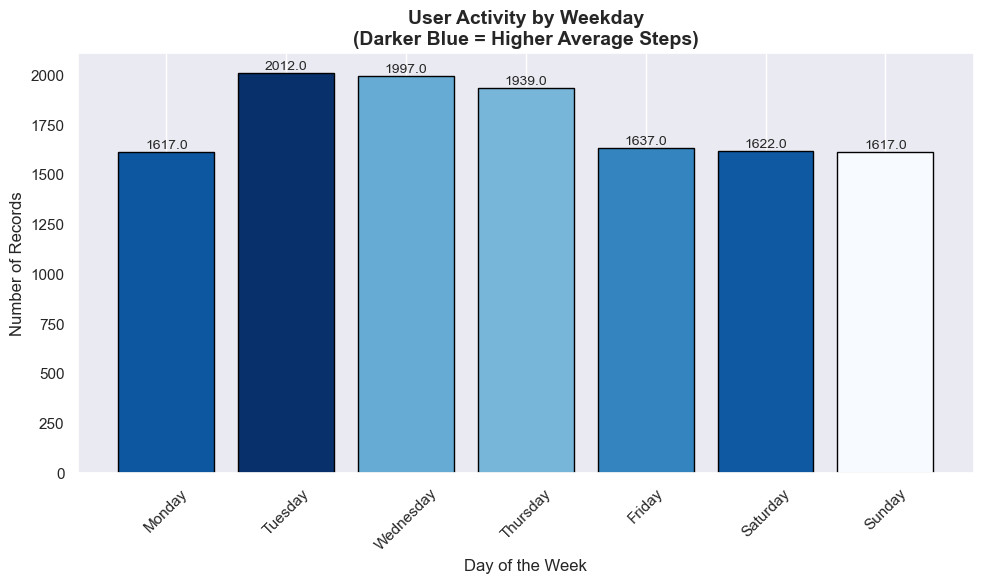

In [310]:
# plotting histogram

# # Set seaborn style for aesthetics
# sns.set(style="whitegrid")

# # Order the days properly
# ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# # Create a countplot instead of manual histogram (easier + prettier for categorical data)
# plt.figure(figsize=(10, 6))
# ax = sns.countplot(data=fitbit_df, x="day_of_the_week", order=ordered_days, palette="Blues", edgecolor="black")

# # Add value labels on top of bars
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
#                 ha='center', va='bottom', fontsize=10)

# # Set labels and title
# plt.xlabel("Day of the Week", fontsize=12)
# plt.ylabel("Number of Records", fontsize=12)
# plt.title("User Activity Logged by Day of the Week", fontsize=14, weight="bold")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

import matplotlib.cm as cm

# Correcting weekday order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Step 1: Calculating average steps p/day
avg_steps_by_day = (
    df.groupby("day_of_the_week")["total_steps"]
    .mean()
    .reindex(ordered_days)
)

# Step 2: Counting number of records (this for bar height)
day_counts = (
    df["day_of_the_week"]
    .value_counts()
    .reindex(ordered_days)
)

# Step 3: Average steps to range 0–1 for thhe colour mapping
norm = (avg_steps_by_day - avg_steps_by_day.min()) / (avg_steps_by_day.max() - avg_steps_by_day.min())

# Step 4: Map normalised values to Blues colormap (higher = darker)
cmap = cm.get_cmap("Blues")  # NOT reversed
mapped_colours = [cmap(val) for val in norm]

# Step 5: Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(day_counts.index, day_counts.values, color=mapped_colours, edgecolor='black')

# Adding value labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=10)

# Styling
plt.title("User Activity by Weekday\n(Darker Blue = Higher Average Steps)", fontsize=14, weight="bold")
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Saving the plot as an image
plt.savefig("Data_visuals/Dataset_visuals_Fitbit/User_Activity_by_Week.png")
plt.show()

In [ ]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df.total_steps, df.calories, 
            alpha = 0.8, c = df.calories, 
            cmap = "Blues", 
            edgecolors='black')

# added annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.savefig("Data_visuals/Dataset_visuals_Fitbit/Calories_burned_by_steps.png")
plt.show()

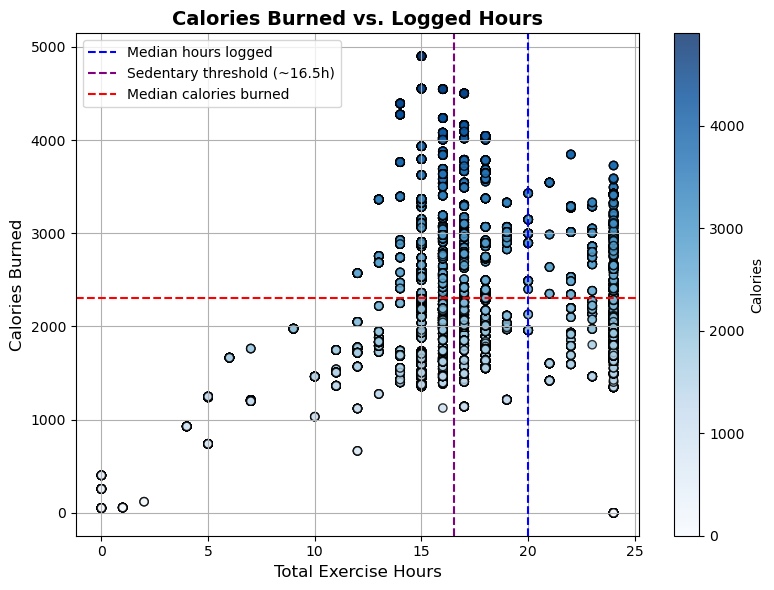

In [ ]:

# Scatterplot: Calories vs Hours Logged
plt.style.use("default")
plt.figure(figsize=(8, 6))

# Fixing column names
x = df["total_exercise_hours"]
y = df["calories"]

# Scatterplot with colour mapped to calories
scatter = plt.scatter(
    x, y,
    alpha=0.8,
    c=y,
    cmap="Blues",
    edgecolors='black'
)

# Adding median lines
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60  

plt.axvline(median_hours, color="blue", linestyle="--", label="Median hours logged")
plt.axvline(median_sedentary, color="purple", linestyle="--", label="Sedentary threshold (~16.5h)")
plt.axhline(median_calories, color="red", linestyle="--", label="Median calories burned")

# Colour bar
cbar = plt.colorbar(scatter)
cbar.set_label("Calories")

# Labels & styling
plt.xlabel("Total Exercise Hours", fontsize=12)
plt.ylabel("Calories Burned", fontsize=12)
plt.title("Calories Burned vs. Logged Hours", fontsize=14, weight="bold")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Saving the plot as an image
plt.savefig("Data_visuals/Dataset_visuals_Fitbit/Calories_burned_for_every_step.png")
plt.show()

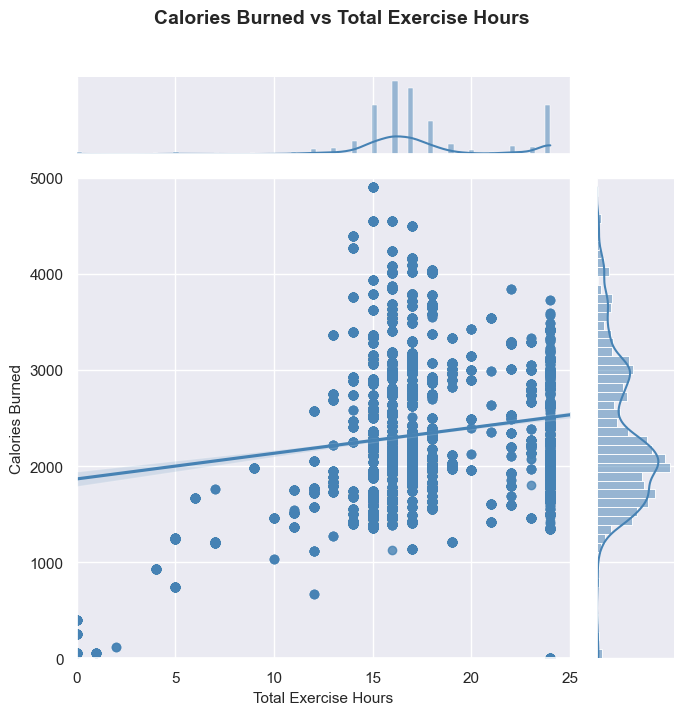

In [ ]:
# Set the style
sns.set_theme(style="darkgrid")

# Clean the data
fitbit_clean = df.dropna(subset=["total_exercise_hours", "calories"])

# Create the jointplot (regression)
g = sns.jointplot(
    data=fitbit_clean,
    x="total_exercise_hours",
    y="calories",
    kind="reg",
    truncate=False,
    height=7,
    color="steelblue" 
)

# Customise axes
g.ax_joint.set_xlim(0, 25)
g.ax_joint.set_ylim(0, 5000)
g.ax_joint.set_xlabel("Total Exercise Hours", fontsize=11)
g.ax_joint.set_ylabel("Calories Burned", fontsize=11)

# Add a title
plt.suptitle("Calories Burned vs Total Exercise Hours", fontsize=14, fontweight="bold", y=1.02)
plt.tight_layout()

# Save the plot
plt.savefig("Data_visuals/Dataset_visuals_Fitbit/Calories_vs_Total_exercise_hours.png", dpi=300)
plt.show()

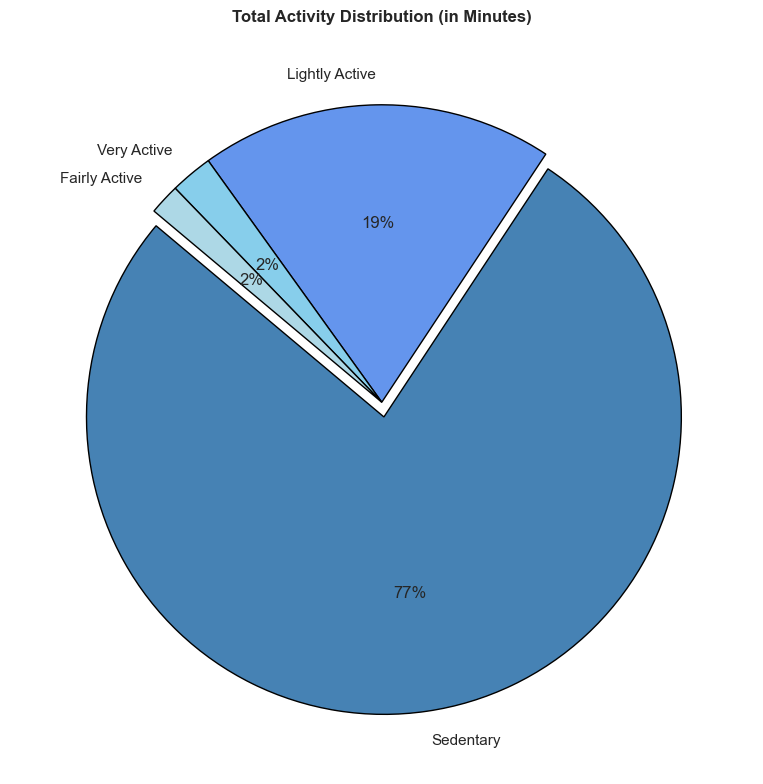

In [ ]:
# calculating total of individual minutes column
# Step 1: Sum minutes across activity levels
very_active = df["very_active_minutes"].sum()
fairly_active = df["fairly_active_minutes"].sum()
lightly_active = df["lightly_active_minutes"].sum()
sedentary = df["sedentary_minutes"].sum()

# Step 2: Build a sorted dataset for visual clarity
activity_data = {
    "Sedentary": sedentary,
    "Lightly Active": lightly_active,
    "Fairly Active": fairly_active,
    "Very Active": very_active
}

# Sort from largest to smallest for better pie chart flow
activity_data = dict(sorted(activity_data.items(), key=lambda item: item[1], reverse=True))

# Extract values and labels
slices = list(activity_data.values())
labels = list(activity_data.keys())

# Custom colours (can change if you prefer a different theme)
colours = ["steelblue", "cornflowerblue", "skyblue", "lightblue"]
explode = [0.05 if i == 0 else 0 for i in range(len(slices))]  # Highlighting biggest slice

# Step 3: Plot
plt.figure(figsize=(8, 8))
plt.pie(
    slices,
    labels=labels,
    colors=colours,
    explode=explode,
    autopct="%1.0f%%",
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Total Activity Distribution (in Minutes)", fontsize=12, weight="bold")
plt.tight_layout()

# Saving the plot as an image
plt.savefig("Data_visuals/Dataset_visuals_Fitbit/percentage_of_activity_minutes.png")
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12441 entries, 0 to 12440
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          12441 non-null  int64         
 1   sleep_day                   12441 non-null  datetime64[ns]
 2   total_sleep_records         12441 non-null  int64         
 3   total_minutes_asleep        12441 non-null  int64         
 4   total_time_in_bed           12441 non-null  int64         
 5   activity_date               12441 non-null  datetime64[ns]
 6   total_steps                 12441 non-null  int64         
 7   total_distance              12441 non-null  float64       
 8   tracker_distance            12441 non-null  float64       
 9   logged_activities_distance  12441 non-null  float64       
 10  very_active_distance        12441 non-null  float64       
 11  moderately_active_distance  12441 non-null  float64   

In [ ]:
df.to_csv("Datasets_files/Data_files_Fitbit/cleaned_fitbit_data.csv", index=False)

**Dataset of overweight and obesity**

In [ ]:
# Defining the file path
file_path_2 = "Datasets_files/Data_files_obesity/Obesity_increase_year.xlsx"
# Loading the CSV file into a dataframe (handling encoding issue if necessary)
obesity_year_df = pd.read_excel(file_path_2)
# Convert the column to a string type before removing the '%'
obesity_year_df['Obesity (BMI ≥30 kg/m2)'] = obesity_year_df['Obesity (BMI ≥30 kg/m2)'].astype(str)
obesity_year_df['Obesity (BMI ≥30 kg/m2)'] = obesity_year_df['Obesity (BMI ≥30 kg/m2)'].str.rstrip('%').astype(float)
# Displaying the first 10 rows of the dataframe
print(obesity_year_df)
#3:36

    Year  Obesity (BMI ≥30 kg/m2)
0   2012                     14.8
1   2013                     14.8
2   2014                     14.9
3   2015                     15.2
4   2016                     15.5
5   2017                     16.1
6   2018                     16.8
7   2019                     19.0
8   2020                     19.0
9   2021                     19.3
10  2022                     19.3
11  2023                     23.6
12  2024                     23.1


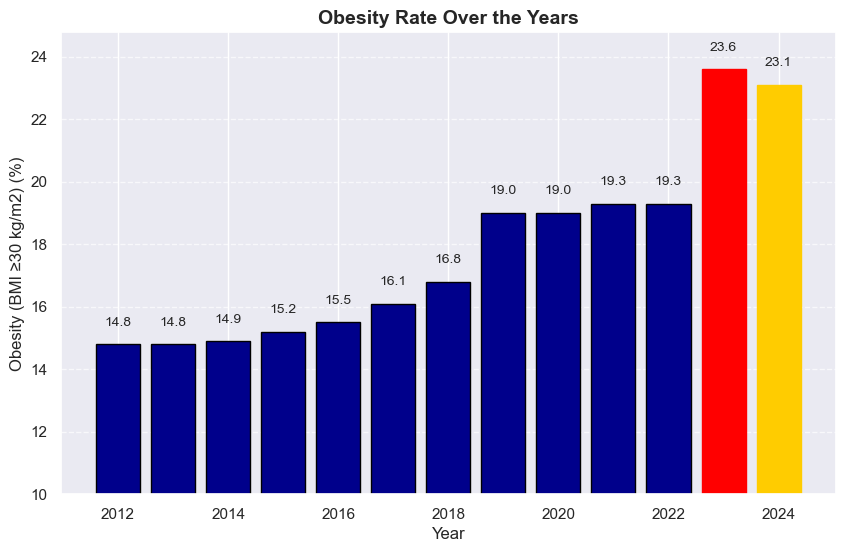

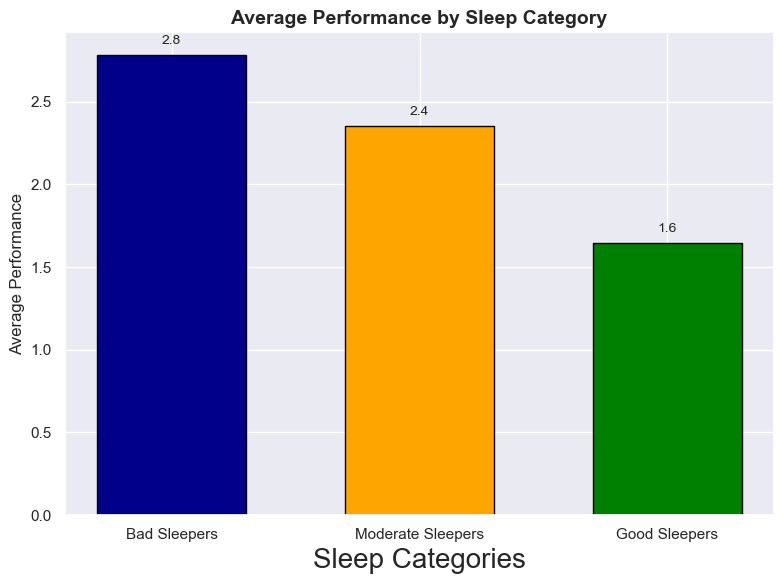

In [ ]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(obesity_year_df['Year'], obesity_year_df['Obesity (BMI ≥30 kg/m2)'], color='darkblue', edgecolor='black')
# Change color of the bars for 2023 and 2024 to red and dark yellow respectively
for bar, year in zip(bars, obesity_year_df['Year']):
    if year == 2023:
        bar.set_color('red')  # Red color for 2023
    elif year == 2024:
        bar.set_color('#FFCC00')  # Dark Yellow (HEX) for 2024
    # Display the exact number on top of each bar with 1 decimal place
    yval = bar.get_height()  # Get the height (value) of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)
# Adding labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Obesity (BMI ≥30 kg/m2) (%)", fontsize=12)
plt.title("Obesity Rate Over the Years", fontsize=14, weight="bold")
# Set the y-axis to start from 10
plt.ylim(bottom=10)
# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Saving the plot as an image
plt.savefig("Data_visuals/Dataset_visuals_Fitbit/obesityRateOverTheYears.png")
plt.show()

import matplotlib.pyplot as plt
# Data for the bar chart
x_labels = ['Bad Sleepers', 'Moderate Sleepers', 'Good Sleepers']
y_values = [average_performance_bad, average_performance_moderate, average_performance_good]
# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, y_values, width=0.6, color=['darkblue', 'orange', 'green'], edgecolor='black')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.1f}', ha='center', va='bottom', fontsize=10)
# Add labels and title
plt.xlabel('Sleep Categories', fontsize=20)
plt.ylabel('Average Performance', fontsize=12)
plt.title('Average Performance by Sleep Category', fontsize=14, weight='bold')
# Show the chart
plt.savefig("Data_visuals/Dataset_visuals_Fitbit/AveragePerformanceBySleepCategory.png")
plt.tight_layout()
plt.show()